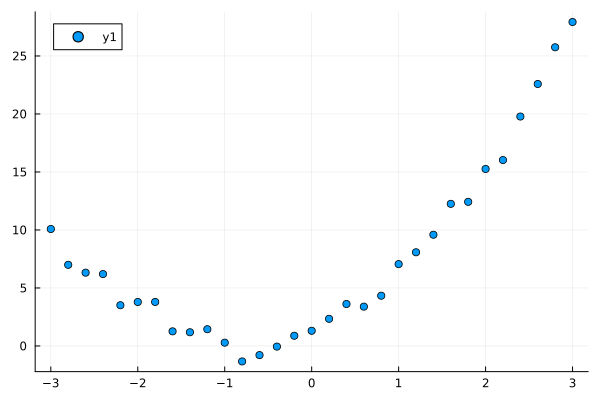

In [2]:
x = -3:0.2:3
f(x) = 2x^2 + 3x + 1
y = @.f(x)
m = length(x)
y += randn(m)

using Plots
scatter(x,y)


In [3]:
n = 3
θ = randn(3)
X = [ones(m) x x.^2] 

31×3 Matrix{Float64}:
 1.0  -3.0  9.0
 1.0  -2.8  7.84
 1.0  -2.6  6.76
 1.0  -2.4  5.76
 1.0  -2.2  4.84
 1.0  -2.0  4.0
 1.0  -1.8  3.24
 1.0  -1.6  2.56
 1.0  -1.4  1.96
 1.0  -1.2  1.44
 ⋮          
 1.0   1.4  1.96
 1.0   1.6  2.56
 1.0   1.8  3.24
 1.0   2.0  4.0
 1.0   2.2  4.84
 1.0   2.4  5.76
 1.0   2.6  6.76
 1.0   2.8  7.84
 1.0   3.0  9.0

$$ 
\min_{\theta} J = \| X\theta - y \|^2
$$

$$
\frac{\partial J}{\partial \theta} = X^T(X \theta - y)
$$

$$
f(x;\theta) = \theta^T x
$$

$$
f(x;\theta) = x\theta
$$

$$
\bar\alpha
$$

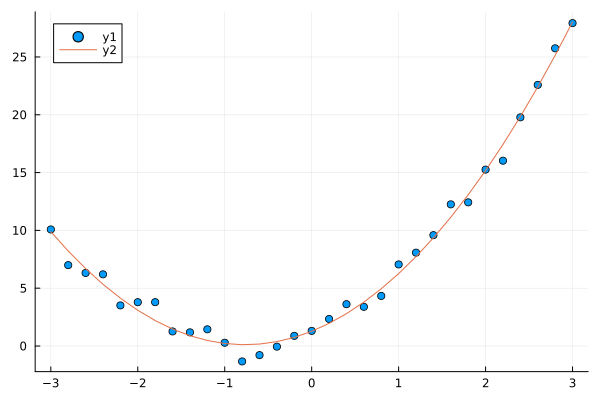

In [4]:
α = 0.01
for i in 1:1000
    θ -= α * X' * (X * θ - y) / (2*m)
end
using Plots
scatter(x,y);pred = X * θ; plot!(x,pred) 


In [2]:
f(x) = 0.1x^5 - 0.4x^4 + x^3  - 2x^2 - x + 1
x = -2:0.01:4
using Plots
y = @.f(x)
plot(x,y);

In [3]:
df(x) = 0.1 * 5x^4 - 0.4 * 4x^3 + 3x^2 - 2 * 2x - 1
d2f(x) = 0.1 * 5 * 4x^3 - 0.4 * 4 * 3x^2 + 3 * 2x - 2 * 2
 

d2f (generic function with 1 method)

In [7]:
using Plots
function Newton_f(t,df,d2f)
    t = 4.0
    T = [t]
    Y = [df(t)]
    while abs(df(t)) < 1e-10
        g = df(t)
        G = d2f(t);
        Δ = G\g
        t -= Δ
        push!(T,t)
        push!(Y,0.0)
        push!(T,x)
        push!(Y,df(t))
    end
    T,Y
end
T,Y = Newton_f(t,df,d2f)



([4.0], [56.599999999999994])

┌ Info: Saved animation to d:\code\大三课程\最优化方法\Newton_f.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\code\\大三课程\\最优化方法\\Newton_f.gif")
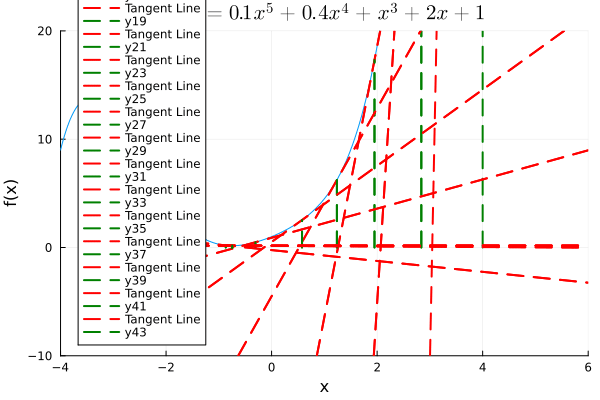

In [4]:
using Plots

# 定义函数
f(x) = 0.1 * x^5 + 0.4 * x^4 + x^2 + 2x + 1

# 求函数的导数和二阶导
df(x) = 0.1 * 5x^4 + 0.4 * 4x^3 + 2x + 2
d2f(x) = 0.1 * 5 * 4x^3 + 0.4 * 4 * 3x^2 + 2

function Newton_f(t, df, d2f)
    T = [t]
    Y = [df(t)]
    
    while abs(df(t)) > 1e-10
        g = df(t)
        G = d2f(t)
        Δ = G\g
        t -= Δ
        
        push!(T, t)
        push!(Y, 0.0)
        push!(T, t)
        push!(Y, df(t))
    end
    
    return T, Y
end

# 定义初始点
t = 4.0
x = -4:0.01:4
y = @.f(x)
# 创建动画对象
anim = @animate for i in 1:10
    T, Y = Newton_f(t, df, d2f)
    
    # 绘制函数
    plot(x , y,  label="f(x)")
    
    # 绘制切线
    for j in 1:length(T)
        tangent_line(x) = df(T[j]) * (x - T[j]) + f(T[j])
        plot!(x -> tangent_line(x), -2, 6, label="Tangent Line", linestyle=:dash, lw=2, color=:red)
        
        # 绘制切点到X轴的垂线
        plot!([T[j], T[j]], [0, f(T[j])], color=:green, linestyle=:dash, lw=2)
    end
    
    xlims!(-4, 6)
    ylims!(-10, 20)
    
    xlabel!("x")
    ylabel!("f(x)")
    title!("\$f(x) = 0.1x^5 + 0.4x^4 + x^3 + 2x + 1\$")
end

gif(anim, "Newton_f.gif", fps=1)


┌ Info: Saved animation to d:\code\大三课程\最优化方法\Newton_f.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\code\\大三课程\\最优化方法\\Newton_f.gif")
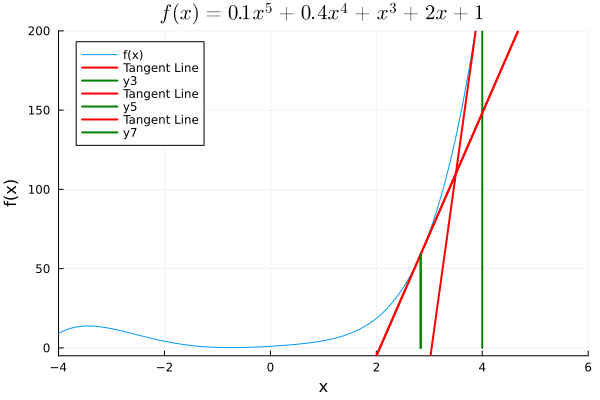

In [23]:
using Plots

# 定义函数
f(x) = 0.1 * x^5 + 0.4 * x^4 + x^2 + 2x + 1

# 求函数的导数和二阶导
df(x) = 0.1 * 5x^4 + 0.4 * 4x^3 + 2x + 2
d2f(x) = 0.1 * 5 * 4x^3 + 0.4 * 4 * 3x^2 + 2

T = []
Y = []

# 定义初始点
t = 4.0
x = -4:0.01:4
y = @.f(x)

function Newton_f(t,df, d2f)
    # 创建动画对象
    anim = @animate while abs(df(t)) > 1e-10

        T = [t]
        Y = [df(t)]
        
        g = df(t)
        G = d2f(t)
        Δ = G\g
        t -= Δ
        
        push!(T, t)
        push!(Y, 0.0)
        push!(T, t)
        push!(Y, df(t))
        
        
        # 绘制函数
        plot(x , y,  label="f(x)")
        
        # 绘制切线
        for j in 1:length(T)
            tangent_line(x) = df(T[j]) * (x - T[j]) + f(T[j])
            plot!(x -> tangent_line(x), -2, 6, label="Tangent Line", lw=2, color=:red)
            
            # 绘制切点到X轴的垂线
            plot!([T[j], T[j]], [0, f(T[j])], color=:green, lw=2)
        end
        
        xlims!(-4, 6)
        ylims!(-5, 200)
        
        xlabel!("x")
        ylabel!("f(x)")
        title!("\$f(x) = 0.1x^5 + 0.4x^4 + x^3 + 2x + 1\$")
    end
    gif(anim, "Newton_f.gif", fps=1)
end
Newton_f(t,df,d2f)

┌ Info: Saved animation to d:\code\大三课程\最优化方法\Newton_f.gif
└ @ Plots C:\Users\86183\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("d:\\code\\大三课程\\最优化方法\\Newton_f.gif")
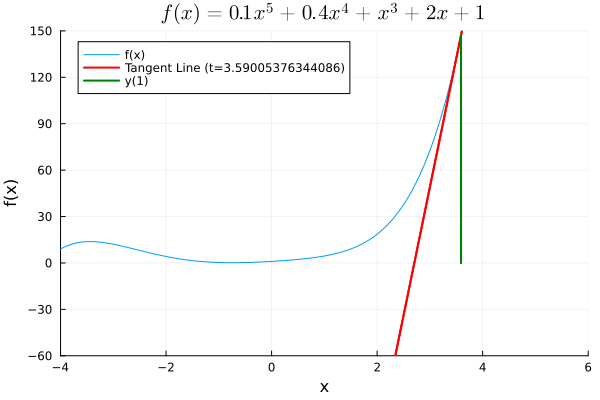

In [23]:
using Plots

# 定义函数
f(x) = 0.1 * x^5 + 0.4 * x^4 + x^2 + 2x + 1

# 求函数的导数和二阶导
df(x) = 0.1 * 5x^4 + 0.4 * 4x^3 + 2x + 2
d2f(x) = 0.1 * 5 * 4x^3 + 0.4 * 4 * 3x^2 + 2

T = []
Y = []

# 定义初始点
t = 5.0
x = -4:0.01:6
y = @.f(x)

# 创建动画对象
anim = Animation()

while abs(df(t)) > 1e-10
    g = df(t)
    G = d2f(t)
    Δ = G\g
    t -= Δ
    
    push!(T, t)
    push!(Y, 0.0)
    push!(T, t)
    push!(Y, df(t))
    
    # 绘制函数
    p = plot(x, y, label="f(x)", xlims=(-4, 6), ylims=(-60, 150), xlabel="x", ylabel="f(x)",
             title="\$f(x) = 0.1x^5 + 0.4x^4 + x^3 + 2x + 1\$")
    
    # 绘制切线和垂线
    for j in 1:length(T)
        tangent_line(x) = df(T[j]) * (x - T[j]) + f(T[j])
        label1 = (j == length(T)) ? "Tangent Line (t=$t)" : "" 
        plot!(p, x, tangent_line, label=label1, lw=2, color=:red)
        label2 = (j == length(T)) ? "y($(Int(j/2)))" : ""  
        plot!(p, [T[j], T[j]], [0, f(T[j])], label=label2,color=:green, lw=2)
    end
    
    frame(anim, p)
end

gif(anim, "Newton_f.gif", fps=1)
